<a href="https://colab.research.google.com/github/jcharrisochoa/Fundamentos_IA_CUC/blob/master/Actividad_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- Tabla de los primeros 10 datos procesados ---
| Largo del Pétalo   | Ancho del Pétalo   | Especie   |
|:-------------------|:-------------------|:----------|
| 1.4                | 0.2                | setosa    |
| 1.4                | 0.2                | setosa    |
| 1.3                | 0.2                | setosa    |
| 1.5                | 0.2                | setosa    |
| 1.4                | 0.2                | setosa    |
| 1.7                | 0.4                | setosa    |
| 1.4                | 0.3                | setosa    |
| 1.5                | 0.2                | setosa    |
| 1.4                | 0.2                | setosa    |
| 1.5                | 0.1                | setosa    |

--- Predicciones para los nuevos puntos ---
Punto: [5.1, 1.8], Predicción: virginica
Punto: [1.5, 0.2], Predicción: setosa
Punto: [4.5, 1.5], Predicción: versicolor
Punto: [6.0, 2.5], Predicción: virginica
Punto: [2.0, 0.5], Predicción: setosa


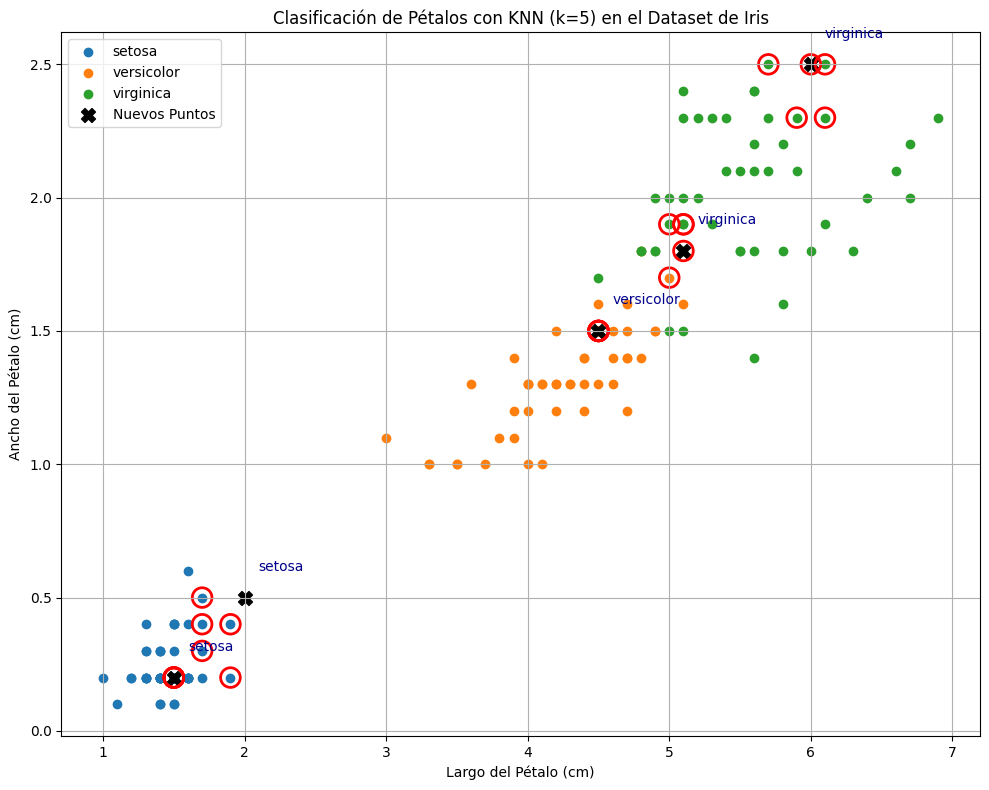

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

# Cargar el dataset de Iris
iris = load_iris()
X = iris.data[:, 2:]  # Usar solo el largo y ancho de los pétalos
y = iris.target
target_names = iris.target_names

# Crear DataFrame
df = pd.DataFrame(X, columns=["Largo del Pétalo", "Ancho del Pétalo"])
df['Especie'] = [target_names[i] for i in y]

# Variables para modificar
nuevos_puntos = [[5.1, 1.8], [1.5, 0.2], [4.5, 1.5], [6.0, 2.5], [2.0, 0.5]]

# Crear y entrenar el modelo KNN con k=5
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X, y) #X: Son los datos de entrenamiento ,y: Son los datos objetivo o etiquetas

# Clasificar los nuevos puntos
predicciones = knn.predict(nuevos_puntos)

# Imprimir información
print("--- Tabla de los primeros 10 datos procesados ---")
print(df.head(10).to_markdown(index=False, numalign="left", stralign="left"))
print("\n--- Predicciones para los nuevos puntos ---")
for i, punto in enumerate(nuevos_puntos):
    prediccion = predicciones[i]
    print(f"Punto: {punto}, Predicción: {target_names[prediccion]}")

# Visualizar
plt.figure(figsize=(10, 8))

# Graficar los datos por especie
for especie in np.unique(y):
    cluster = df[df['Especie'] == target_names[especie]]
    plt.scatter(cluster["Largo del Pétalo"], cluster["Ancho del Pétalo"], label=target_names[especie])

# Graficar los nuevos puntos
plt.scatter([p[0] for p in nuevos_puntos], [p[1] for p in nuevos_puntos], color='black', marker='X', s=100, label='Nuevos Puntos')

# Graficar los vecinos más cercanos para cada nuevo punto
for i, punto in enumerate(nuevos_puntos):
    distancias, indices = knn.kneighbors([punto], n_neighbors=k)
    for idx in indices[0]:
        vecino = X[idx]
        plt.scatter(vecino[0], vecino[1], edgecolor='red', facecolor='none', s=200, linewidths=2)

# Añadir texto con la predicción para cada nuevo punto
for i, punto in enumerate(nuevos_puntos):
    prediccion_texto = target_names[predicciones[i]]
    plt.text(punto[0] + 0.1, punto[1] + 0.1, prediccion_texto, fontsize=10, color='darkblue')

# Atributos para el gráfico
plt.title("Clasificación de Pétalos con KNN (k=5) en el Dataset de Iris")
plt.xlabel("Largo del Pétalo (cm)")
plt.ylabel("Ancho del Pétalo (cm)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()